In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline

https://www.tensorflow.org/api_docs/python/tf/compat/v1/estimator/experimental/KMeans


In [3]:
mall = pd.read_csv('Mall_Customers_KMeans.csv', header=0)

In [4]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
mall.shape

(200, 5)

C:\Users\amali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


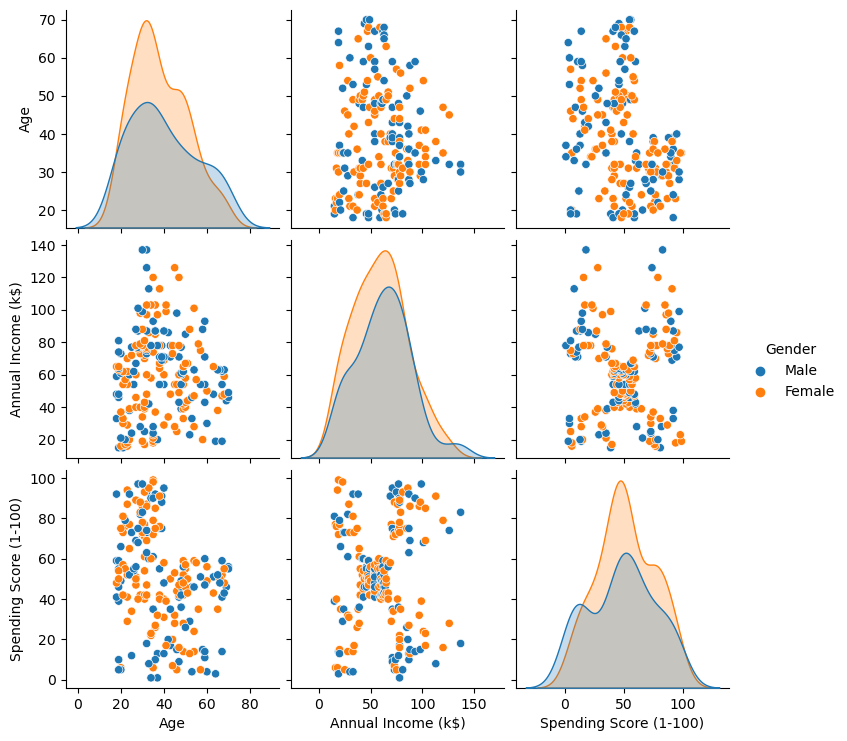

In [20]:
sns.pairplot(mall, hue='Gender',vars=['Age','Annual Income (k$)','Spending Score (1-100)'])

##Apply Feature Scaling
Clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale. Feature scaling of the data can help produce good results.

https://machinelearningknowledge.ai/sklearn-feature-scaling-with-standardscaler-minmaxscaler-robustscaler-and-maxabsscaler/

https://machinelearningmastery.com/handle-missing-data-python/

In [6]:
scaler = StandardScaler()
scale = scaler.fit_transform(mall[['Age','Annual Income (k$)','Spending Score (1-100)']])
df_scale = pd.DataFrame(scale, columns = ['Age','Annual Income (k$)','Spending Score (1-100)']);
#df_scale.insert(loc=2,column='Gender',value=mall.Gender)
df_scale['Gender'] = mall.Gender
df_scale.head(5)

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,Male
1,-1.281035,-1.738999,1.195704,Male
2,-1.352802,-1.700830,-1.715913,Female
3,-1.137502,-1.700830,1.040418,Female
4,-0.563369,-1.662660,-0.395980,Female


C:\Users\amali\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


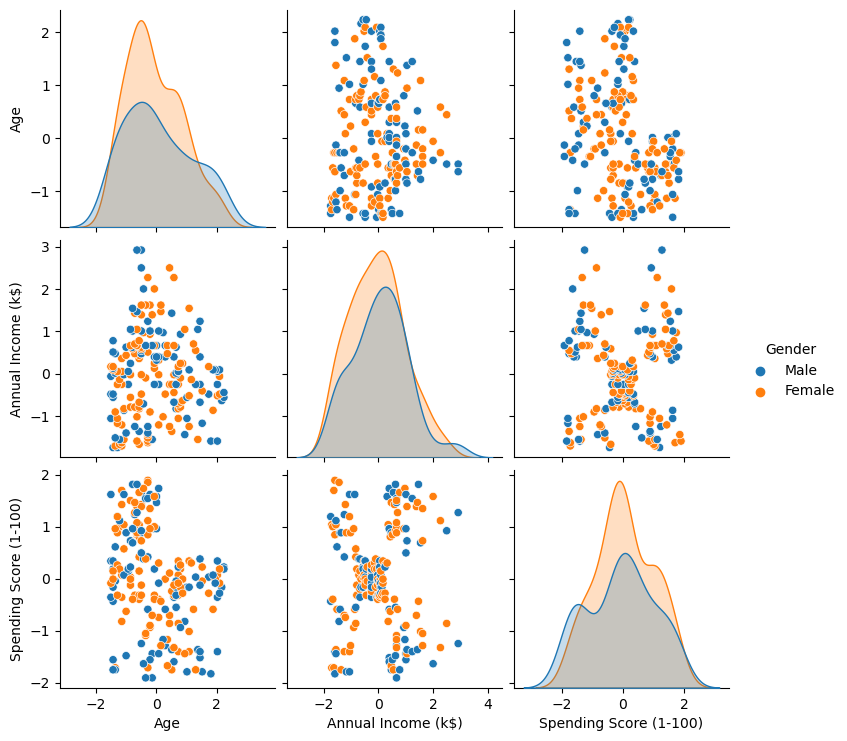

In [22]:
sns.pairplot(df_scale, hue = 'Gender' )

In [7]:
#Applying Kmeans with 2 Clusters (K=2)
km=KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted[0:10,]
#sum(y_predicted)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int32)

In [8]:
km.cluster_centers_

array([[ 0.02408534,  0.90345187],
       [-0.01931167, -0.72438934]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

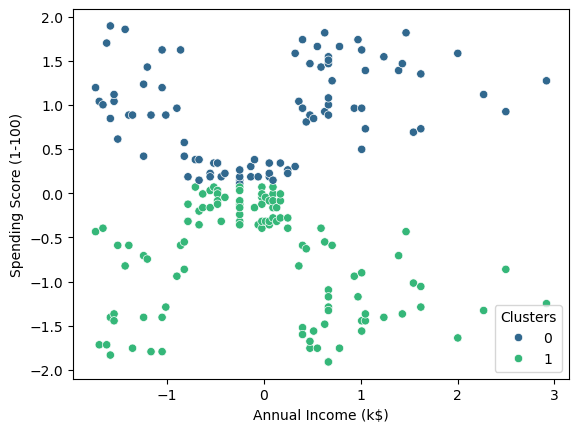

In [9]:
df_scale['Clusters'] = km.labels_
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=df_scale, palette='viridis')

It is evident that there is a scope for data to be grouped into more clusters than only 2. But how to know how many clusters?

**Elbow Method** : calculate the Within-Cluster-Sum of Squared Errors (WCSS) for different k and choose the k for which WCSS starts to diminish.


1.   The Squared Error for a data point is the square of the distance of a point from its cluster center.
2.   The WSS score is the summation of Squared Errors for all given data points.
3.   Distance metrics like Euclidean Distance or the Manhattan Distance can be used.



In [10]:
K=range(2,20)
wss = []

for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

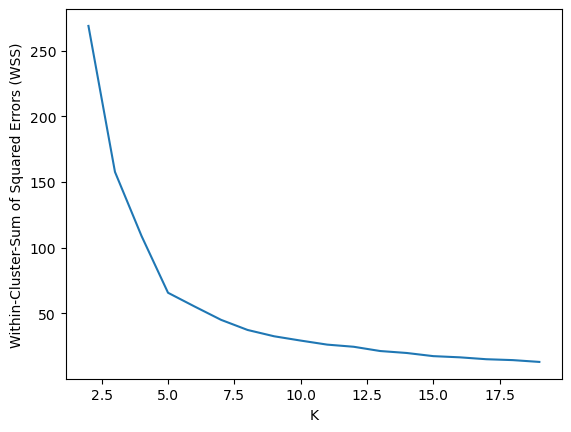

In [11]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

## The Silhouette Method
The silhouette value measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering.
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#:~:text=Compute%20the%20mean%20Silhouette%20Coefficient,max(a%2C%20b)%20.

In [12]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
df_scale = pd.DataFrame(scale, columns = ['Age','Annual Income (k$)','Spending Score (1-100)']);
for i in range(2,13):
  labels=cluster.KMeans(n_clusters=i,random_state=200).fit(df_scale).labels_
  print ("Silhouette score for k(clusters) = "+str(i)+" is "
  +str(metrics.silhouette_score(df_scale,labels,metric="euclidean",sample_size=1000,random_state=200)))

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

Silhouette score for k(clusters) = 2 is 0.3354719289400458
Silhouette score for k(clusters) = 3 is 0.35779338871027205
Silhouette score for k(clusters) = 4 is 0.4039582785148566
Silhouette score for k(clusters) = 5 is 0.4166434151373277
Silhouette score for k(clusters) = 6 is 0.4268547747113388
Silhouette score for k(clusters) = 7 is 0.4180766295787896
Silhouette score for k(clusters) = 8 is 0.40694842797445224
Silhouette score for k(clusters) = 9 is 0.3869225585368908
Silhouette score for k(clusters) = 10 is 0.39936385263538215
Silhouette score for k(clusters) = 11 is 0.40967440384753706
Silhouette score for k(clusters) = 12 is 0.3886936251192343


/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
# We will use 2 Variables for this example
kmeans = KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(df_scale[['Annual Income (k$)','Spending Score (1-100)']])
#x="Annual Income (k$)", y="Spending Score (1-100)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

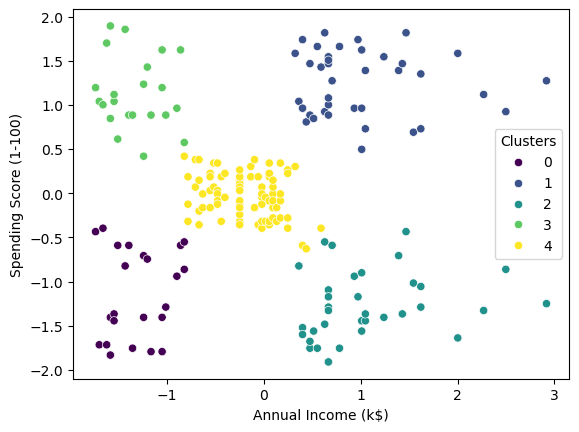

In [14]:
df_scale['Clusters'] = kmeans.labels_
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)",hue = 'Clusters',  data=df_scale, palette='viridis')

## K means for higher dimension data
K Means Clustering with Principal Component Analysis

By applying principal component analysis (PCA) on the dataset, we can reduce its dimension to only two while still preserving the information. And then clustering can be applied to this transformed dataset and then visualized in a 2-D plot. Moreover, PCA can also help to avoid the curse of dimensionality.

https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/#:~:text=Step%2D1%3ATo%20decide%20the,new%20centroid%20for%20every%20cluster.